In [ ]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn import preprocessing
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
train_data = pd.read_csv("/content/train.csv")
test_data = pd.read_csv("/content/test.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
len(train_data)

891

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
train_data.replace("?", np.nan, inplace=True)

In [ ]:
train_data['Age'] = train_data['Age'].fillna(0)

In [ ]:
train_data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [ ]:
train_data['Embarked'] = train_data['Embarked'].fillna('S')

In [ ]:
labelencoder = preprocessing.LabelEncoder()
train_data['Embarked'] = labelencoder.fit_transform(train_data['Embarked'])

In [ ]:
train_data['Embarked'].unique()

array([2, 0, 1])

In [ ]:
train_data.isnull().sum(axis = 0)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [ ]:
train_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked         int64
dtype: object

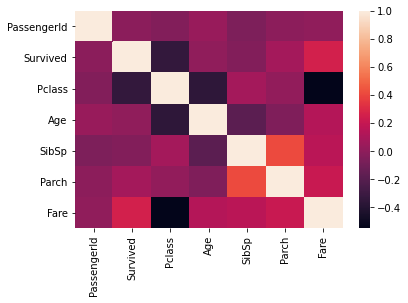

In [ ]:
sns.heatmap(train_data.corr())

In [ ]:
train_data.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658,0.013128
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-0.167675
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.162098
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,-0.030394
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,0.068230
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,0.039798
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,-0.224719
Embarked,0.013128,-0.167675,0.162098,-0.030394,0.068230,0.039798,-0.224719,1.000000


In [ ]:
train1 = train_data.dropna(subset=["Age"])
train1.head(6)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,2
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,2


In [ ]:
len(train1)

714

In [ ]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
qw = np.array(train1['Age']).reshape(714,1)
er = np.array(train1[['Pclass','Parch','SibSp']]).reshape(714,3)
mod = reg.fit(er,qw)

In [ ]:
rsq = reg.score(er,qw)
rsq

0.22290554263641416

In [ ]:
testage = train_data[['Pclass','Parch','SibSp']]
testage

,Pclass,Parch,SibSp
0,3,0,1
1,1,0,1
2,3,0,0
3,1,0,1
4,3,0,0
...,...,...,...
886,2,0,0
887,1,0,0
888,3,2,1
889,1,0,0


In [ ]:
predict = reg.predict(testage.values.reshape(891,3))
pred = pd.DataFrame(data=predict)
pred.head(6)

,0
0,23.753312
1,35.887156
2,27.703111
3,35.887156
4,27.703111
5,27.703111


In [ ]:
pred[0][1]

35.88715622566268

In [ ]:
train_data['Age'][5]

0.0

In [ ]:
for i in range(891):
  if train_data['Age'][i] == 0:
    train_data['Age'][i] = pred[0][i]
 


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
train_data['Age'][5]

27.703110856140597

In [ ]:
train_data.interpolate(method = 'linear', limit_direction='forward', inplace = True)
train_data.head()

In [ ]:
len(train_data['Age'])

891

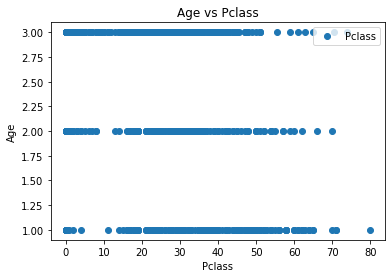

In [ ]:
train_data.plot(x='Age', y='Pclass', style='o')  
plt.title('Age vs Pclass')  
plt.xlabel('Pclass')  
plt.ylabel('Age')  
plt.show()

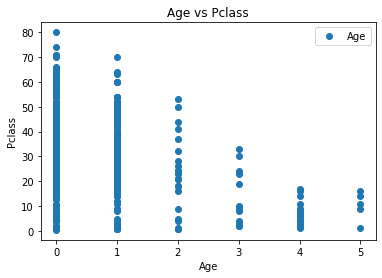

In [ ]:
train_data.plot(x='SibSp', y='Age', style='o')  
plt.title('Age vs SibSp')  
plt.xlabel('SibSp')  
plt.ylabel('Age')  
plt.show()

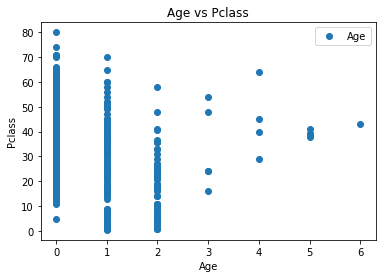

In [ ]:
train_data.plot(x='Parch', y='Age', style='o')  
plt.title('Age vs Parch')  
plt.xlabel('Parch')  
plt.ylabel('Age')  
plt.show()

In [ ]:
A = train_data[['SibSp']]
A1 = train_data['Age']

In [ ]:
avgage = train_data["Age"].mean(axis=0)
avgage

29.69911764705882

In [ ]:
train_data["Age"].replace(np.nan, avgage, inplace=True)

In [ ]:
train_data["Age"]=train_data["Age"]/train_data["Age"].max()
train_data["Fare"]=train_data["Fare"]/train_data["Fare"].max()

In [ ]:
variable = pd.get_dummies(train_data["Sex"])
variable.head()

In [ ]:
train_data = pd.concat([train_data,variable], axis=1)
train_data.head()

In [ ]:
train_data.drop("Sex", axis=1, inplace=True)

In [ ]:
train_data.drop("female", axis=1, inplace=True)

In [ ]:
train_data.drop("male", axis=1, inplace=True)

In [ ]:
train_data.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,female,male
PassengerId,1.000000,-0.005007,-0.035144,0.035136,-0.057527,-0.001652,0.012658,0.013128,-0.042939,0.042939
Survived,-0.005007,1.000000,-0.338481,0.009153,-0.035322,0.081629,0.257307,-0.167675,0.543351,-0.543351
Pclass,-0.035144,-0.338481,1.000000,-0.360251,0.083081,0.018443,-0.549500,0.162098,-0.131900,0.131900
Age,0.035136,0.009153,-0.360251,1.000000,-0.185689,-0.049673,0.134806,0.082041,-0.026309,0.026309
SibSp,-0.057527,-0.035322,0.083081,-0.185689,1.000000,0.414838,0.159651,0.068230,0.114631,-0.114631
Parch,-0.001652,0.081629,0.018443,-0.049673,0.414838,1.000000,0.216225,0.039798,0.245489,-0.245489
Fare,0.012658,0.257307,-0.549500,0.134806,0.159651,0.216225,1.000000,-0.224719,0.182333,-0.182333
Embarked,0.013128,-0.167675,0.162098,0.082041,0.068230,0.039798,-0.224719,1.000000,-0.108262,0.108262
female,-0.042939,0.543351,-0.131900,-0.026309,0.114631,0.245489,0.182333,-0.108262,1.000000,-1.000000
male,0.042939,-0.543351,0.131900,0.026309,-0.114631,-0.245489,-0.182333,0.108262,-1.000000,1.000000


In [ ]:
test_data.replace("?", np.nan, inplace=True)
avgage1 = test_data["Age"].mean(axis=0)
avgage1

30.272590361445783

In [ ]:
test_data.isnull().sum(axis = 0)

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [ ]:
test_data['Embarked'].value_counts()

S    270
C    102
Q     46
Name: Embarked, dtype: int64

In [ ]:
test_data['Embarked'] = test_data['Embarked'].fillna('S')

In [ ]:
labelencoder = preprocessing.LabelEncoder()
test_data['Embarked'] = labelencoder.fit_transform(test_data['Embarked'])

In [ ]:
test_data.corr()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Embarked
PassengerId,1.000000,-0.026751,-0.034102,0.003818,0.043080,0.008209,0.040699
Pclass,-0.026751,1.000000,-0.492143,0.001087,0.018721,-0.576619,0.227983
Age,-0.034102,-0.492143,1.000000,-0.091587,-0.061249,0.335029,-0.175848
SibSp,0.003818,0.001087,-0.091587,1.000000,0.306895,0.171488,0.052708
Parch,0.043080,0.018721,-0.061249,0.306895,1.000000,0.230001,0.054577
Fare,0.008209,-0.576619,0.335029,0.171488,0.230001,1.000000,-0.257031
Embarked,0.040699,0.227983,-0.175848,0.052708,0.054577,-0.257031,1.000000


In [ ]:
test1 = test_data.dropna(subset=["Age"])
test1.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,2


In [ ]:
len(test1)

332

In [ ]:
from sklearn import linear_model
reg1 = linear_model.LinearRegression()
ad = np.array(test1['Age']).reshape(332,1)
fg = np.array(test1[['Pclass','Fare','Embarked','SibSp','Parch']]).reshape(332,5)
mod = reg1.fit(fg,ad)

In [ ]:
rsq1 = reg1.score(fg,ad)
rsq1

0.25958450771781616

In [ ]:
testage1 = test_data[['Pclass','Parch','SibSp','Fare','Embarked']]
testage1

,Pclass,Parch,SibSp,Fare,Embarked
0,3,0,0,7.8292,1
1,3,0,1,7.0000,2
2,2,0,0,9.6875,1
3,3,0,0,8.6625,2
4,3,1,1,12.2875,2
...,...,...,...,...,...
413,3,0,0,8.0500,2
414,1,0,0,108.9000,0
415,3,0,0,7.2500,2
416,3,0,0,8.0500,2


In [ ]:
predict1 = reg1.predict(testage1.values.reshape(418,5))
pred1 = pd.DataFrame(data=predict)
pred1.head(6)

,0
0,23.753312
1,35.887156
2,27.703111
3,35.887156
4,27.703111
5,27.703111


In [ ]:
test_data['Age'] = test_data['Age'].fillna(0)

In [ ]:
for i in range(418):
  if test_data['Age'][i] == 0:
    test_data['Age'][i] = pred1[0][i]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
test_data['Age'][12]

23.0

In [ ]:
fare1 = test_data["Fare"].mean(axis=0)
fare1

35.6271884892086

In [ ]:
test_data["Fare"].replace(np.nan, fare1, inplace=True)


In [ ]:
test_data.interpolate(method = 'linear', limit_direction='both', inplace=True)

In [ ]:
test_data.isnull().sum(axis = 0)

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [ ]:
test_data["Age"].replace(np.nan, avgage1, inplace=True)
test_data.head()

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,female,male
0,892,3,"Kelly, Mr. James",0.453947,0,0,330911,0.015282,NaN,Q,0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0.618421,1,0,363272,0.013663,NaN,S,1,0
2,894,2,"Myles, Mr. Thomas Francis",0.815789,0,0,240276,0.018909,NaN,Q,0,1
3,895,3,"Wirz, Mr. Albert",0.355263,0,0,315154,0.016908,NaN,S,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0.289474,1,1,3101298,0.023984,NaN,S,1,0


In [ ]:
variable1 = pd.get_dummies(test_data["Sex"])
variable1.head()

,female,male
0,0,1
1,1,0
2,0,1
3,0,1
4,1,0


In [ ]:
test_data = pd.concat([test_data, variable1], axis=1)
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,female,male
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,1,0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,2,1,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,1,0,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,2,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,2,1,0


In [ ]:
test_data.drop("Sex", axis=1, inplace=True)

In [ ]:
test_data

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,female,male
0,892,3,"Kelly, Mr. James",34.500000,0,0,330911,7.8292,NaN,1,0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",47.000000,1,0,363272,7.0000,NaN,2,1,0
2,894,2,"Myles, Mr. Thomas Francis",62.000000,0,0,240276,9.6875,NaN,1,0,1
3,895,3,"Wirz, Mr. Albert",27.000000,0,0,315154,8.6625,NaN,2,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.000000,1,1,3101298,12.2875,NaN,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",33.770033,0,0,A.5. 3236,8.0500,NaN,2,0,1
414,1306,1,"Oliva y Ocana, Dona. Fermina",39.000000,0,0,PC 17758,108.9000,C105,0,1,0
415,1307,3,"Saether, Mr. Simon Sivertsen",38.500000,0,0,SOTON/O.Q. 3101262,7.2500,NaN,2,0,1
416,1308,3,"Ware, Mr. Frederick",28.405632,0,0,359309,8.0500,NaN,2,0,1


In [ ]:
X = train_data[['Pclass','Age','SibSp','Parch','Fare','female','male','Embarked']].values 

In [ ]:
Y = train_data['Survived'].values

In [ ]:
from sklearn import preprocessing

In [ ]:
X_scaled = preprocessing.scale(X)

In [ ]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))

In [ ]:
X[0:5]

array([[ 0.82737724, -0.55604973,  0.43279337, -0.47367361, -0.50244517,
        -0.73769513,  0.73769513],
       [-1.56610693,  0.59548094,  0.43279337, -0.47367361,  0.78684529,
         1.35557354, -1.35557354],
       [ 0.82737724, -0.26816707, -0.4745452 , -0.47367361, -0.48885426,
         1.35557354, -1.35557354],
       [-1.56610693,  0.37956894,  0.43279337, -0.47367361,  0.42073024,
         1.35557354, -1.35557354],
       [ 0.82737724,  0.37956894, -0.4745452 , -0.47367361, -0.48633742,
        -0.73769513,  0.73769513]])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.2, random_state=0)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (712, 10) (712,)
Test set: (179, 10) (179,)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
k = 19
classifier = KNeighborsClassifier(n_neighbors = k, p=2, metric='euclidean')
classifier

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=19, p=2,
                     weights='uniform')

In [ ]:
classifier.fit(X,Y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=19, p=2,
                     weights='uniform')

In [ ]:
test_data.isnull().any()

PassengerId    False
Pclass         False
Name           False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked       False
female         False
male           False
dtype: bool

In [ ]:
fareavg = test_data["Fare"].mean(axis=0)
fareavg

0.06953964070212786

In [ ]:
test_data["Fare"].replace(np.nan, fareavg, inplace=True)

In [ ]:
X1 = test_data[['Pclass','Age','SibSp','Parch','Fare','female','male']].values
X1_scaled = preprocessing.scale(X1)

In [ ]:
yhat = classifier.predict(X1)
yhat

array([0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,

In [ ]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, classifier.predict(X_train)))


Train set Accuracy:  0.8300561797752809


In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_scaled,Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
loghat = logreg.predict(X1_scaled)
loghat

ValueError: ignored

In [ ]:
df = pd.DataFrame({'Survived': loghat})

In [ ]:
df.head()

,Survived
0,0
1,0
2,0
3,0
4,1


In [ ]:
id = test_data["PassengerId"]

In [ ]:
df = pd.concat([df,id], axis=1)

In [ ]:
df.head()

,Survived,PassengerId
0,0,892
1,0,893
2,0,894
3,0,895
4,1,896


In [ ]:
df = df[['PassengerId','Survived']]

In [ ]:
df.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [ ]:
df.to_csv('titanic4.csv', index = False)

In [ ]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

In [ ]:
X = scaler.fit_transform(X.astype(float))

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 19, p=2, metric='euclidean')

In [ ]:
knn.fit(X, Y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=19, p=2,
                     weights='uniform')

In [ ]:
yhat1 = knn.predict(X1)

In [ ]:
yhat1

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
df1 = pd.DataFrame({'Survived': yhat1})
df1 = pd.concat([df1,id], axis=1)
df1 = df1[['PassengerId','Survived']]
df1.to_csv('titanic2.csv', index = False)